In [178]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import numpy as np 

In [179]:
df = pd.read_csv("datasets/diabetes.csv")
x = df.drop("Outcome",axis=1).values
y = df['Outcome'].values
x_train, x_test = train_test_split(x,test_size=0.8,random_state=0)
y_train, y_test = train_test_split(y,test_size=0.8,random_state=0)

In [180]:
k_score_range = np.arange(start=1,stop=153)
test_score = np.empty(len(k_score_range)+1)
train_score = np.empty(len(k_score_range)+1)


In [181]:
for k in k_score_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)

    train_score[k] = knn.score(x_train,y_train)
    test_score[k] = knn.score(x_test,y_test)

train_score = np.delete(train_score, 0)
test_score = np.delete(test_score, 0)
print("Max is "+str(test_score.max())+" at k="+str(test_score.argmax()+1))

Max is 0.6991869918699187 at k=19


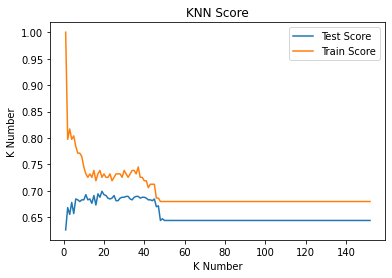

In [182]:
plt.title("KNN Score")
plt.plot(k_score_range,test_score,label="Test Score")
plt.plot(k_score_range,train_score,label="Train Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("K Number")
plt.show()